<center>

# Projet Méthode du gradient stochastique appliquée à un problème de classification

</center>

Fait par :
 - Bensaleh Haitem 21205853 
 - Bouhedja Amir Wail 21117276 
 - Khelif Amine Khelif 21116456


## 1 - Introduction 
&nbsp;&nbsp;&nbsp;&nbsp;Dans ce projet, nous explorons la méthode du gradient stochastique à travers deux phases distinctes. Premièrement, nous commençons avec un "exemple jouet" qui vise à localiser le centre d'un cercle à partir d'un ensemble de points, offrant une approche pratique pour comprendre et visualiser le fonctionnement de la méthode des gradients stochastiques. Ensuite, nous abordons une application plus complexe et réaliste : un problème de classification de données médicales liées au cancer du sein. Ici, l'objectif est de développer un modèle de classification logistique binaire capable de différencier entre des tumeurs invasives et bénignes, en utilisant des descripteurs basés sur des mesures prises sur des patientes. Avec une base de données de 569 patientes, nous entraînons et testons notre modèle, mettant ainsi en pratique la théorie dans un contexte significatif et impactant.

In [1]:
# Cellule à éxécuter une seule fois pour importer toutes les bibliothèques nécessaires dans le projet

import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score

## 2 - Exemple Jouet

In [2]:
# Fonction de Génération de la data en cercle non-bruité
def cercle_points(x_centre, y_centre, rayon, n_points):
    """Renvoie n_points répartis sur un cercle de centre (x_centre, y_centre) et de rayon rayon"""
    t = np.linspace(0, 2*np.pi, n_points)
    x = x_centre + rayon*np.cos(t)
    y = y_centre + rayon*np.sin(t)
    return x, y


In [3]:
# Fonction pour afficher la data
def plot_cercle_points(x_centre, y_centre, rayon, n_points):
    """Trace un cercle de centre (x_centre, y_centre) et de rayon rayon, et n_points points répartis sur ce cercle"""
    x, y = cercle_points(x_centre, y_centre, rayon, n_points)
    plt.plot(x, y, 'r+')
    plt.axis('equal')
    plt.grid()
    
    plt.show()

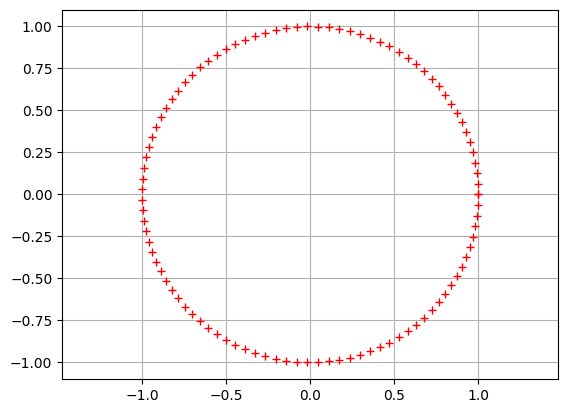

In [4]:
plot_cercle_points(0, 0, 1, 100)

In [5]:
# Fonction pour bruiter la data
def noised_cercle_points(x_centre, y_centre, rayon, n_points, noise):
    """Renvoie n_points répartis sur un cercle de centre (x_centre, y_centre) et de rayon rayon,
    avec un bruit de moyenne 0 et d'écart-type noise"""
    x, y = cercle_points(x_centre, y_centre, rayon, n_points)
    x = x + np.random.normal(0, noise, n_points)
    y = y + np.random.normal(0, noise, n_points)
    return x, y

In [6]:
# Fonction d'affichage de la data bruitée
def plot_noised_cercle_points(point_cloud):
    """Trace un cercle de centre (x_centre, y_centre) et de rayon rayon, et n_points points répartis sur ce cercle,
    avec un bruit de moyenne 0 et d'écart-type noise"""
    x, y = point_cloud
    plt.plot(x, y, 'r+')
    plt.axis('equal')
    plt.grid()
    
    plt.show()

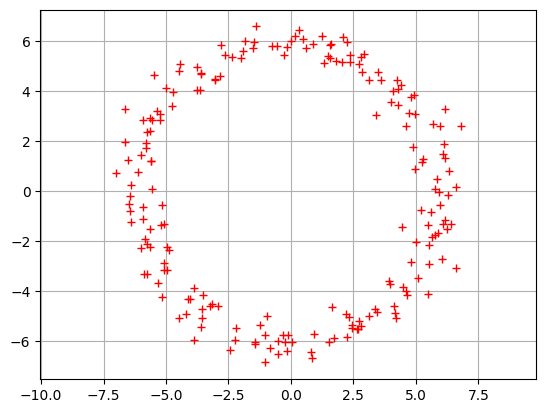

In [7]:
point_cloud = noised_cercle_points(0, 0, 6, 200, 0.5)
plot_noised_cercle_points(point_cloud)

In [8]:
# Gradient a pas fixe pour determiner le cercle (centre et rayon ) qui passe le mieux par les points en minimisan la fonction de cout j(x,y) = sum((x-xi)^2 + (y-yi)^2)
def gradient_descent(point_cloud, lr, n_iter, noise):
    """Renvoie le centre et le rayon du cercle qui passe au mieux par les points (x, y) en minimisant la fonction de coût j(x, y) = sum((x-xi)^2 + (y-yi)^2)"""
    x,y = point_cloud
    n_points = len(x)
    x_centre = random.uniform(-1, 1)
    y_centre = random.uniform(-1, 1)
    rayon = random.uniform(0, 1)
    
    x_centre_list = []
    y_centre_list = []
    rayon_list = []
    
    x_centre_list.append(x_centre)
    y_centre_list.append(y_centre)
    rayon_list.append(rayon)
    
    for i in range(n_iter):
        x_centre = x_centre - lr * (2 * (x_centre - x) / n_points).sum()
        y_centre = y_centre - lr * (2 * (y_centre - y) / n_points).sum()
        rayon = rayon - lr * (2 * (rayon - np.sqrt((x - x_centre)**2 + (y - y_centre)**2) + np.random.normal(0, noise, n_points)) / n_points).sum()
        
        x_centre_list.append(x_centre)
        y_centre_list.append(y_centre)
        rayon_list.append(rayon)
        
    return x_centre, y_centre, rayon , x_centre_list,y_centre_list,rayon_list

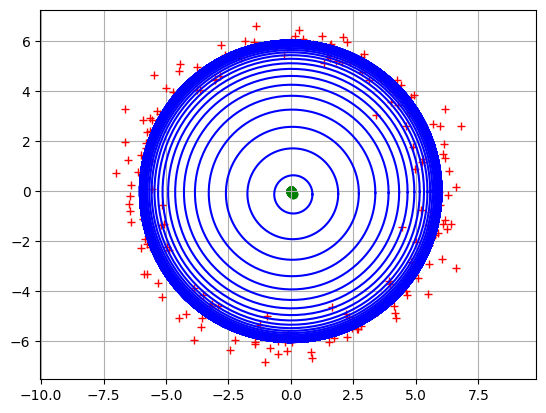

In [9]:
x_center , y_center , rayon ,x_centre_list,y_centre_list,rayon_list= gradient_descent(point_cloud, 0.1, 100, 0.1)
x, y = point_cloud
# Affichage des centres intermédiaires
plt.plot(x, y, 'r+') 

#  Affichage des cercles intermédiaires

for i in range(len(x_centre_list)):
    plt.plot(*cercle_points(x_centre_list[i], y_centre_list[i], rayon_list[i], 100), 'b')
    plt.scatter(x_centre_list[i], y_centre_list[i], color='g')
    plt.axis('equal')
plt.grid()
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;En conclusion, l'exploration de la méthode du gradient stochastique a permis de démontrer son efficacité dans des contextes où la fonction coût est complexe, composée d'un grand nombre de fonctions coûts élémentaires. L'approche adoptée, consistant à choisir aléatoirement un terme du gradient à chaque itération, a révélé un équilibre intéressant entre rapidité de calcul et précision. \
&nbsp;&nbsp;&nbsp;&nbsp;Nous nous orientons maintenant vers une application pratique de cette méthode. Dans cette seconde partie, nous allons appliquer les principes appris à un cas d'étude concret : le problème de classification du cancer du sein. Cela nous permettra de tester l'efficacité de la méthode dans un contexte réel et d'observer son potentiel dans la résolution de problèmes complexes d'apprentissage automatique.

# 3 - Application à un problème de classification
&nbsp;&nbsp;&nbsp;&nbsp;Nous appliquons la méthode du gradient stochastique à la classification de données médicales, en particulier pour distinguer les tumeurs invasives des tumeurs bénignes du sein. Utilisant la classification logistique binaire, nous construisons un modèle prédictif basé sur 30 descripteurs par patiente, avec une base de données de 569 cas. Les notations clés sont :
- $ y $: catégorie binaire (0 ou 1)
- $ x = (x_1, x_2, ..., x_n) $: descripteurs
- $ n $: nombre de descripteurs
- $ \{ (x^{(k)}, y^{(k)}) \}_{k=1, N} $: données d'apprentissage
- $ N $: taille de l'échantillon
- $ Y $: variable aléatoire pour la catégorie
- $ X $: variable aléatoire pour les descripteurs

La classification logistique utilise un modèle probabiliste pour prédire l'appartenance à une classe binaire Y à partir de descripteurs X. 

<img src="image.png" width=600>



&nbsp;&nbsp;&nbsp;&nbsp;Elle s'appuie sur la fonction sigmoïde $ \sigma(z) = \frac{1}{1 + e^{-z}} $ pour estimer $ P(Y = 1|X = x) $. Le modèle linéaire $ z = w_0 + w_1x_1 + ... + w_nx_n $ est ajusté grâce à l'apprentissage des paramètres $ w $, en maximisant la log-vraisemblance. Les méthodes d'optimisation, comme le gradient stochastique, sont utilisées pour optimiser cette fonction de coût.

&nbsp;&nbsp;&nbsp;&nbsp;Dans la section sur l'apprentissage des paramètres $\omega$, l'objectif est de maximiser la fonction $ \pi(x) $ pour les points de la classe  Y = 1 et de minimiser $\pi(x)$ pour ceux de la classe Y = 0 . On utilise la probabilité conditionnelle $ P(Y = y|X = x) $ exprimée par $ \pi(x) $ et $ 1 - \pi(x) $ pour les deux classes. L'apprentissage vise à maximiser la vraisemblance, ou équivalent log-vraisemblance pour faciliter le calcul. Cette vraisemblance est le produit des probabilités pour chaque point de l'échantillon. On maximise alors la log-vraisemblance négative, une fonction coût, à travers l'optimisation des paramètres $\omega$.
La fonction coût  J  a minimiser est définie comme :
 $$
 J(w) = -\frac{1}{n} \sum_{i=1}^{n} \left[ y^{(i)} \log(\pi(x^{(i)})) + (1 - y^{(i)}) \log(1 - \pi(x^{(i)})) \right] 
 $$

In [10]:
# La base de données est stocker dans le fichier data_classification.csv
# Partitionner la base de données en deux sous-ensembles : le premier contient 80% des exemples et sert à
# entrainer le classifieur, alors que les 20% restant sont utilisés pour le tester. La partition est faite
# aléatoirement.

data = pd.read_csv('data_classification.csv', sep=',', header=None)
data = data.to_numpy()
X = data[:,1:31]
y = data[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

In [11]:
def sigmoid(z):
    """
    Calcule la fonction sigmoïde pour un vecteur ou une valeur scalaire.
    """
    return 1 / (1 + np.exp(-z))

In [12]:
# Définition de la fonct coût J
def cost_function(X, y, w):
    epsilon = 1e-5  # Small constant to avoid log(0)
    predictions = sigmoid(np.dot(X, w))
    predictions = np.clip(predictions, epsilon, 1 - epsilon)  # Clip values to avoid 0 or 1
    return -1/len(y) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

## L'expression analytique de $ \nabla J(w)$:
&nbsp;&nbsp;&nbsp;&nbsp;Le gradient de $ J(w) $ par rapport au poids $ w_j $ est donné par la dérivée partielle de $ J(w) $ par rapport à $ w_j $. Nous utiliserons la règle de la chaîne pour obtenir ce gradient. La règle de la chaîne pour la fonction sigmoïde et la fonction de coût de l'entropie croisée est bien connue et peut être dérivée comme suit.

La dérivée de la fonction sigmoïde $ \sigma(x) $ par rapport à $ x $ est :
$$
\sigma'(x) = \sigma(x)(1 - \sigma(x))
$$
En appliquant la règle de la chaîne pour la dérivée de $ \log(\pi_w(x)) $ par rapport à $ w_j $, nous avons :
$$
\frac{\partial}{\partial w_j} \log(\pi_w(x)) = \frac{1}{\pi_w(x)} \cdot \frac{\partial \pi_w(x)}{\partial w_j}
$$
En utilisant la dérivée de la fonction sigmoïde, nous obtenons pour $ \pi_w(x) $ :
$$
\frac{\partial \pi_w(x)}{\partial w_j} = \pi_w(x)(1 - \pi_w(x)) \cdot x_j
$$

En combinant les dérivées partielles, nous obtenons le gradient de la fonction de coût :
$$
\frac{\partial}{\partial w_j} J(w) = -\frac{1}{N} \sum_{k=1}^{N} \left[ (y^{(k)} - \pi_w(x^{(k)})) \cdot x_j^{(k)} \right]
$$

Pour déterminer le gradient de la fonction de coût $ J(w) $ pour la régression logistique, nous partons de la fonction de coût donnée, qui est la fonction de coût de l'entropie croisée pour la classification binaire :
$$
J(w) = -\frac{1}{N} \sum_{k=1}^{N} \left[ y^{(k)} \log (\pi_w(x^{(k)})) + (1 - y^{(k)}) \log (1 - \pi_w(x^{(k)})) \right]
$$
où $ \pi_w(x) $ est la probabilité prédite qu'une entrée $ x $ appartienne à la classe 1, qui est modélisée par la fonction sigmoïde $ \sigma $ de la combinaison linéaire des descripteurs $ x $ et des poids $ w $ :
$$
\pi_w(x) = \sigma(w_0 + w_1 x_1 + w_2 x_2 + \ldots + w_n x_n)
$$
$$
\sigma(x) = \frac{1}{1+e^{-x}}
$$

Le gradient de $ J(w) $ par rapport au poids $ w_j $ est donné par la dérivée partielle de $ J(w) $ par rapport à $ w_j $. Nous utiliserons la règle de la chaîne pour obtenir ce gradient. La règle de la chaîne pour la fonction sigmoïde et la fonction de coût de l'entropie croisée est bien connue et peut être dérivée comme suit.

La dérivée de la fonction sigmoïde $ \sigma(x) $ par rapport à $ x $ est :
$$
\sigma'(x) = \sigma(x)(1 - \sigma(x))
$$

En appliquant la règle de la chaîne pour la dérivée de $ \log(\pi_w(x)) $ par rapport à $ w_j $, nous avons :
$$
\frac{\partial}{\partial w_j} \log(\pi_w(x)) = \frac{1}{\pi_w(x)} \cdot \frac{\partial \pi_w(x)}{\partial w_j}
$$

En utilisant la dérivée de la fonction sigmoïde, nous obtenons pour $ \pi_w(x) $ :
$$
\frac{\partial \pi_w(x)}{\partial w_j} = \pi_w(x)(1 - \pi_w(x)) \cdot x_j
$$

En combinant ces deux et en prenant la dérivée de $ -y^{(k)} \log(\pi_w(x^{(k)})) - (1 - y^{(k)}) \log(1 - \pi_w(x^{(k)})) $, nous obtenons :

$$
\frac{\partial}{\partial w_j} J(w) = -\frac{1}{N} \sum_{k=1}^{N} \left[ y^{(k)} (1 - \pi_w(x^{(k)})) \cdot x_j^{(k)} - (1 - y^{(k)}) \pi_w(x^{(k)}) \cdot x_j^{(k)} \right]
$$

Ce qui se simplifie en :

$$
\frac{\partial}{\partial w_j} J(w) = -\frac{1}{N} \sum_{k=1}^{N} \left[ (y^{(k)} - \pi_w(x^{(k)})) \cdot x_j^{(k)} \right]
$$

In [13]:
def cost_function_prime(X, y, w):
    """
    Calcule le gradient de la fonction de coût par rapport aux paramètres w.
    """
    return 1/len(y) * np.dot(X.T, sigmoid(np.dot(X, w)) - y)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Cette fonction ci-dessous "batch_generator", agit comme un générateur de lots de données pour l'entraînement de modèles d'apprentissage automatique. Elle prend en entrée deux ensembles de données, X (entrées) et y (étiquettes), et génère des lots de données ou des exemples individuels en fonction du mode spécifié.\
**Mode 'batch' :**
- Génère des lots de données.
- Itère sur l'ensemble de données avec un pas de `batch_size`.
- À chaque itération, renvoie un lot de `batch_size` exemples d'entraînement (`X_batch`) et leurs étiquettes correspondantes (`y_batch`).

**Mode 'single' :**
- Génère des exemples individuels.
- Itère sur l'ensemble de données, renvoyant à chaque itération un exemple d'entraînement individuel (`X_single`) et son étiquette correspondante (`y_single`).


In [23]:
def batch_generator(X, y, batch_size, mode):
    if mode == 'batch':
        indices = np.random.choice(len(X), batch_size, replace=False)
        yield X[indices], y[indices]
    elif mode == 'single':
        for i in range(len(X)):
            yield X[i:i + 1], y[i:i + 1]

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Ensuite, on définit la fonction $\pi_w (x)$

In [24]:
def predict(X, w):
        """
        Prédit la classe des exemples de X en utilisant le classifieur linéaire défini par les paramètres w.
        """
        predictions = sigmoid(np.dot(X, w))
        return predictions

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; On définit ensuite la certitude, afin de connaître le pourcentage de similitude entre résultats vrais et résultats prédits

In [25]:
def accuracy_(y, y_pred):
    """
    Calcule la précision du classifieur.
    """
    y_pred = y_pred.round()
    return accuracy_score(y, y_pred)

In [26]:
# Définition de la fonction de gradient descendant à pas fixe pour mode = 'single', et gradient stochastique pour mode = 'batch'
def gradient_descent(X, y, w, lr, n_iter, precision, batch_size=1, mode='batch', momentum=False, gamma=0.9):
    """
    Implémente l'algorithme de descente de gradient.
    """
    accuracy_list = []
    w_history = [w]
    cost_history = [cost_function(X, y, w)]
    v = np.zeros(w.shape)
    for i in range(n_iter):
        for X_batch, y_batch in batch_generator(X, y, batch_size, mode):
            grad = cost_function_prime(X_batch, y_batch, w)
            if momentum:
                v = gamma * v + lr * grad
                w = w - v
            else:
                w = w - lr * grad
        w_history.append(w)
        cost_history.append(cost_function(X, y, w))
        predictions = predict(X, w)
        accuracy = accuracy_(y, predictions)
        accuracy_list.append(accuracy)
        if np.linalg.norm(cost_history[-1] - cost_history[-2]) < precision:
            break
    return w , cost_history , w_history,accuracy_list

In [27]:
# Execution du gradient_descent
w , cost_history , w_history ,accuracy_list= gradient_descent(X_train, y_train, np.zeros(X_train.shape[1]), 0.1, 500, 10e-8, batch_size=4, mode='batch', momentum=True, gamma=0.9)

In [28]:
# Cellule pour afficher la précision
predictions = predict(X_test, w)

a = accuracy_(y_test, predictions)
print(f"accuracy :  {100 * a} %")


accuracy :  92.98245614035088 %


In [29]:
cm ,average_precision_score_,precision_score_,classification_report_= 0,0,0,0
# plotting the confusion matrix

cm = confusion_matrix(y_test, predictions.round())

# plotting the precision-recall curve

average_precision_score_ = average_precision_score(y_test, predictions)

# plotting the precision score

precision_score_ = precision_score(y_test, predictions.round())

# plotting the cost function

print(f"cost function : {cost_history[-1]}")
print(f"accuracy :  {100 * a} %")
print("\n \n")
print(f"confusion matrix :\n {cm}")
print("\n \n")
print(cm[0][0], "is the number of true positives (correctly predicted positive class).")
print(cm[0][1], "is the number of false negatives (incorrectly predicted negative class).")
print(cm[1][0], "is the number of false positives (incorrectly predicted positive class).")
print(cm[1][1], "is the number of true negatives (correctly predicted negative class).")
print("\n \n")

print(f"average precision : {average_precision_score_}")
print(f"precision score : {precision_score_}")


cost function : 0.24528057150869803
accuracy :  92.98245614035088 %

 

confusion matrix :
 [[66  6]
 [ 2 40]]

 

66 is the number of true positives (correctly predicted positive class).
6 is the number of false negatives (incorrectly predicted negative class).
2 is the number of false positives (incorrectly predicted positive class).
40 is the number of true negatives (correctly predicted negative class).

 

average precision : 0.9846392037923454
precision score : 0.8695652173913043


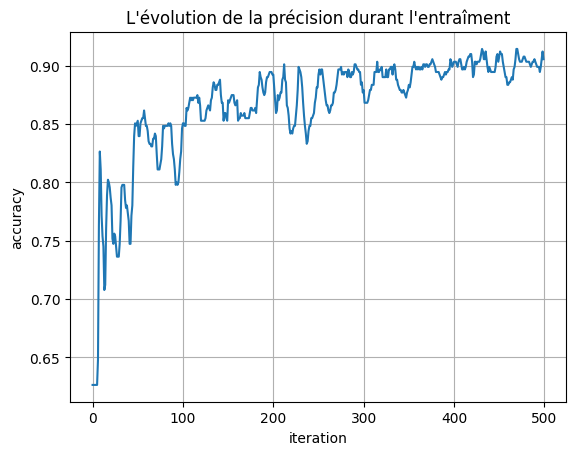

In [30]:
plt.plot(accuracy_list)
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.grid()
plt.title("L'évolution de la précision durant l'entraîment")
plt.show()

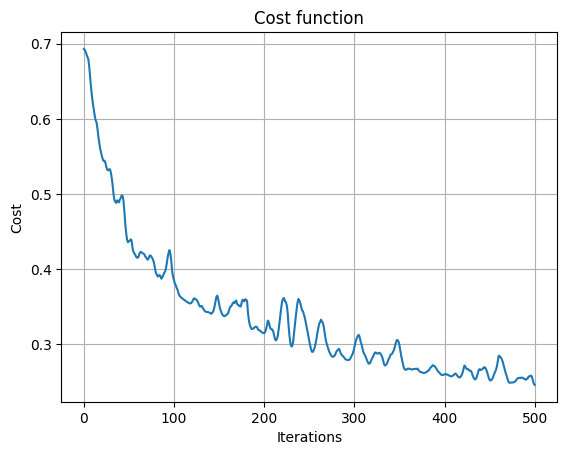

In [31]:
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function')
plt.grid()
plt.show()

## 4 - Conclusion 
&nbsp;&nbsp;&nbsp;&nbsp;En conclusion, ce projet a réussi à appliquer efficacement la méthode du gradient stochastique, initialement sur un cas-test simple, puis sur un problème complexe de classification du cancer du sein. Les étapes, de l'analyse des données à l'implémentation de la méthode, ont démontré l'efficacité et la pertinence de cette approche dans des applications réelles. Les résultats obtenus ouvrent des perspectives prometteuses pour l'utilisation de ces techniques dans des domaines plus larges, soulignant l'importance de la recherche continue dans ce secteur.